In [1]:
import tensorflow as tf
from tensorflow import keras



In [2]:
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers.schedules import ExponentialDecay, PiecewiseConstantDecay, CosineDecay
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

# import tensorflow.keras.optimizers.schedules.ExponentialDecay
# import tensorflow.keras.optimizers.schedules.PiecewiseConstantDecay
# import tensorflow.keras.optimizers.schedules.CosineDecay

Load the CIFAR10 dataset

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
# x_train.shape
# y_train.shape
# y_train = np.reshape(y_train, (50000, ))


170498071/170498071 [==============================] - 2s 0us/step


In [4]:
num_classes = 10
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)


In [ ]:
# datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True)
# datagen.fit(x_train)
# num_augmented_samples = 2000
# augmented_data = []
# augmented_labels = []

In [ ]:
# while len(augmented_data) < num_augmented_samples:
#  batch_x, batch_y = datagen.flow(x_train, y_train, batch_size = num_augmented_samples - len(augmented_data)).next()
#   augmented_data.extend(batch_x)
#   augmented_labels.extend(batch_y)



In [ ]:
# Convert the lists to NumPy arrays
# augmented_data = np.array(augmented_data)
# augmented_labels = np.array(augmented_labels)

# Concatenate the original training data with the augmented data
# x_train_augmented = np.concatenate((x_train, augmented_data), axis=0)
# y_train_augmented = np.concatenate((y_train, augmented_labels), axis=0)

Normalizing the pixel values to the range [0, 1]

In [5]:
import numpy as np
np.shape(x_train)
np.shape(x_test)

(10000, 32, 32, 3)

In [6]:
x_train, x_test = x_train/255.0, x_test/225.0

Defining and Compiling the CNN Model

In [7]:
from tensorflow.keras.layers import Activation

def get_model():


  model = keras.Sequential([
      layers.Conv2D(32, (3, 3), input_shape = (32, 32, 3)),
      BatchNormalization(),
      Activation('relu'),
      layers.MaxPooling2D(2, 2),
      layers.Dropout(0.35),
      layers.Conv2D(64, (3, 3)),
      BatchNormalization(),
      Activation('relu'),
      layers.MaxPooling2D((2, 2)),
      layers.Dropout(0.35),
      layers.Conv2D(256, (3, 3)),
      Activation('relu'),
      layers.Dropout(0.35),
      layers.Flatten(),
      layers.Dense(64, activation='relu'),
      layers.Dropout(0.35),
      BatchNormalization(),
      layers.Dense(10, activation='softmax'),
  ])



  # Define a learning rate schedule
  learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
      initial_learning_rate=0.01,
      decay_steps=10000,
      decay_rate=0.96
  )

  # Create an optimizer with the learning rate schedule
  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_schedule)

  model.compile(optimizer=optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

  return model

Train

Increasing Validation Accuracy:



Batch Normalization: After the ReLUs of all convolutional layers.

DropOut:

Batch Size: 128.

Initial Learning Rate: 0.01.

Learning Rate Decay Scale: 0.1 , applied after [200, 250, 300] epochs.

Initialization for convolutional layers: He Initialization.

Weight Decay: L2-Regularization with scale=0.001.

Epoch 1/200
1563/1563 [==============================] - 26s 8ms/step - loss: 1.9723 - accuracy: 0.2459 - val_loss: 1.9156 - val_accuracy: 0.2888
Epoch 2/200
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7456 - accuracy: 0.3417 - val_loss: 1.7525 - val_accuracy: 0.3497
Epoch 3/200
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5979 - accuracy: 0.4076 - val_loss: 1.5720 - val_accuracy: 0.4470
Epoch 4/200
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4914 - accuracy: 0.4593 - val_loss: 1.6964 - val_accuracy: 0.4526
Epoch 5/200
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4079 - accuracy: 0.4913 - val_loss: 1.2260 - val_accuracy: 0.5748
Epoch 6/200
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3510 - accuracy: 0.5193 - val_loss: 1.2640 - val_accuracy: 0.5472
Epoch 7/200
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2949 - accuracy: 0.5425 - val_loss: 1.1952 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


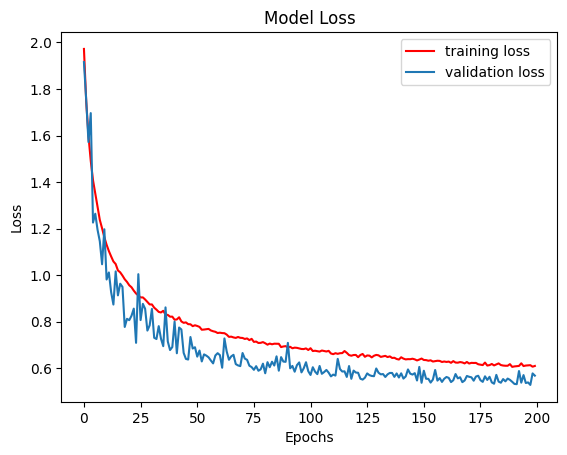

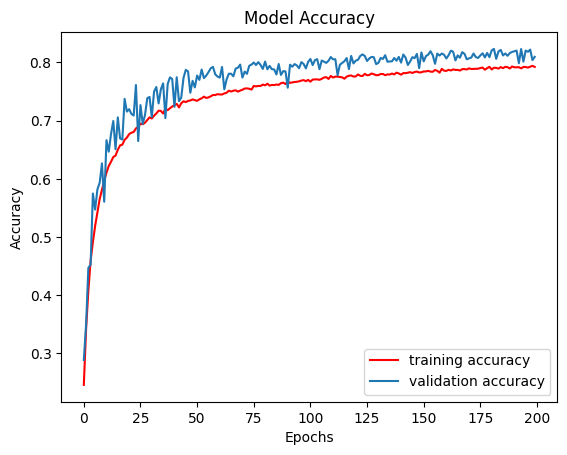

In [8]:
from keras.api._v2.keras import callbacks

from IPython.core import history


with tf.device('/device:GPU:0'):
  model = get_model()

  history = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_test, y_test))


model_path = '/content/drive/My Drive/Ronald/models/'
model.save(model_path+'model_categories.h5')

from matplotlib import pyplot as plt
plt.plot(history.history['loss'], 'r', label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')

plt.title('Model Loss')
plt.ylabel('Loss')

plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], 'r', label = "training accuracy")
plt.plot(history.history['val_accuracy'], label = "validation accuracy")

plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9312 - accuracy: 0.6934


In [ ]:
image_path = '/content/drive/My Drive/Research/Data/Classifier'
model_path = '/content/drive/My Drive/Ronald/models/'

In [ ]:
import numpy as np
y_pred = [] #store predicted labels
y_true = [] #store true labels

for image_batch, label_batch in val_ds:
  y_true.append(label_batch)
  preds = saved_model.predict(image_batch)
  y_pred.append(np.argmax(preds, axis = -1))


In [ ]:
import tensorflow
true_categories = tensorflow.concat([item for item in y_true], axis = 0)
predicted_categories = tensorflow.concat([item for item in y_pred], axis = 0)

In [ ]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(true_categories, predicted_categories, normalize='pred')

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])